There is a jump in loss in the last target, which seems like data leakage but cannot find where..

In [30]:
from src.config import config
import pandas as pd

from src.processing.utils import add_target,  create_sequences, create_sequences_target, standardize
import numpy as np
from src.models.transformers import Transformer
import torch


In [16]:
config.data_dir

PosixPath('/Users/pablocanadapereira/Desktop/Projects/transformer-training/data')

In [60]:
pairs =["xlmeur", "bcheur","compeur","xdgeur", "etheur", "algoeur", "bateur", "adaeur","xrpeur"]
input_directory = config.data_dir / "validation"
for pair_name in pairs:
    df = pd.read_csv(input_directory / f"{pair_name}.csv")#.head(700)
    break

In [61]:



df = add_target(df, column_to_apply="open", target_list=[5])
 # dropna
df = df.dropna()
bins = [-np.inf]+ config.bins_label+[np.inf]
labels = [int(i) for i in range(len(bins)-1)]

df[config.class_target] = pd.cut(df[config.numeric_target], bins=bins, labels=labels).astype(int)

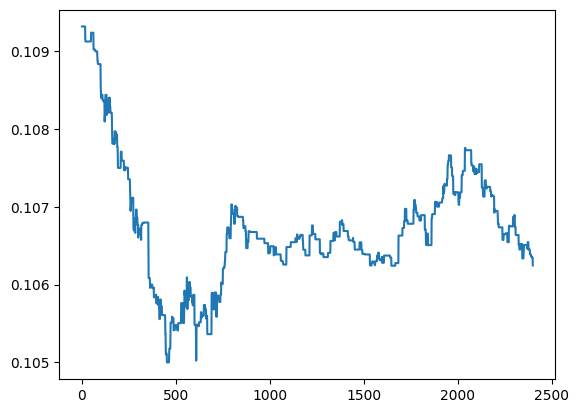

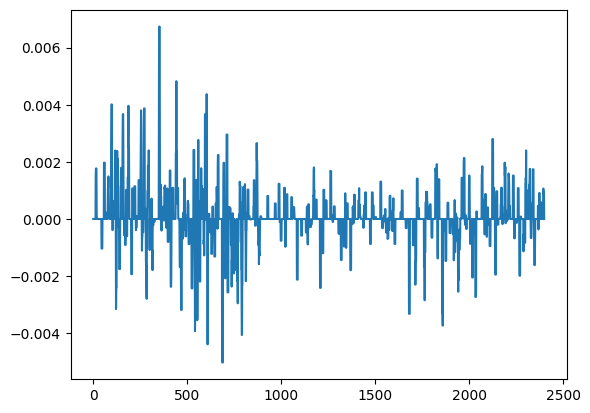

In [62]:
from matplotlib import pyplot as plt


plt.plot(df.open)
plt.show()
plt.plot(df.target_5)

In [63]:



X_raw = create_sequences(df[config.features].values, config.block_size)
X = standardize(X_raw)
y = create_sequences_target(df[config.class_target].values, config.block_size)

In [64]:



m = Transformer(config)
    # load weights from gpu


m.load_state_dict(torch.load(config.weights_dir / "weights.pt", map_location=torch.device("cpu")))

# Evaluate model
m.eval()
out = m(X.squeeze())

In [65]:
pred = out.softmax(dim=-1).argmax(dim=-1)

In [67]:
pred.size()

torch.Size([2300, 100])

In [94]:
y[:,-1].size()

torch.Size([2300])

In [92]:
torch.randint(low=0,high=1, size=()

TypeError: randint() missing 1 required positional arguments: "size"

In [99]:
y[:,-1].size()

torch.Size([2300])

In [111]:
torch.randint(low=0,high=2, size=y[:,-1].size())

tensor([1, 1, 0,  ..., 1, 1, 0])

In [121]:
(torch.randint(low=0,high=2, size=y[:,-1].size()) == y[:,-1]).sum()/y[:,-1].size()[0]

tensor(0.5009)

In [128]:
(y==0).sum()

tensor(158115)

In [127]:
y.count_nonzero()/(y==0).sum()

tensor(0.4546)

In [124]:
y.count_nonzero()/y.squeeze().size()[0]

tensor(31.2543)

In [88]:
np.random.randint(2, (1e4)) == np.random.randint(2, (1e4))

False

Accuracy in last position:  tensor(0.6570)


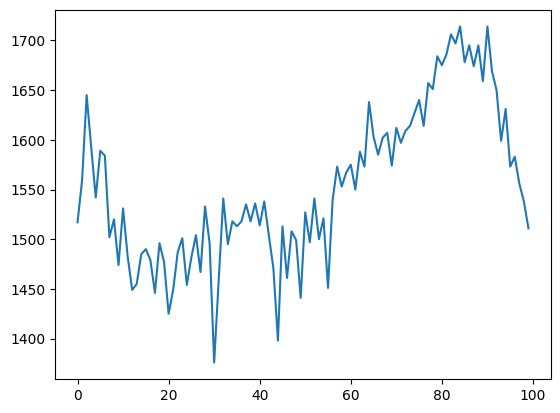

In [68]:
# what is the accuracy depending on the position
print("Accuracy in last position: ", (pred[:,-1]==y[:,-1]).sum()/len(y))
print("Baseline: ", (np.randint()==0).sum()/len(y))
plt.plot((pred==y).sum(0))

In [49]:
y.size()

torch.Size([596, 100])

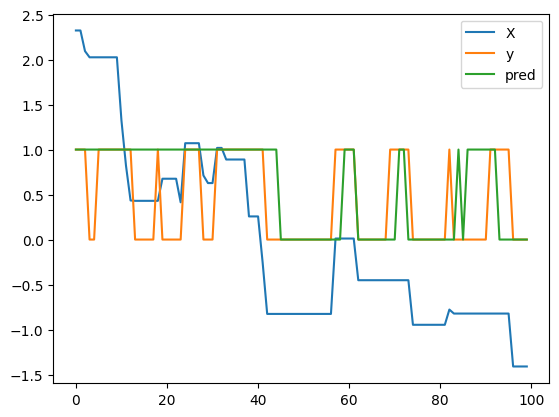

In [45]:
idx=150
plt.plot(X[idx], label="X")
plt.plot(y[idx], label="y")
plt.plot(out.softmax(dim=-1).argmax(dim=-1)[idx], label="pred")
plt.legend()
plt.show()